# **Background Generation**

## **Functions**

In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")

from morphan import MorphAn

import skimage.io as io
import numpy as np
import multiprocessing as mp

## **Image Process**
---

#### *Determine Parameters*

* Edit "image_path" variable with a path to an image that you want to evaluate
* Edit "target_slice" variable with a row index that you want to evaluate

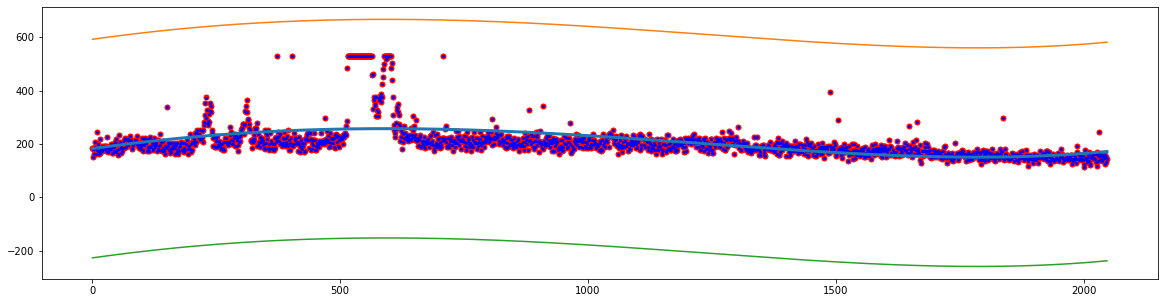

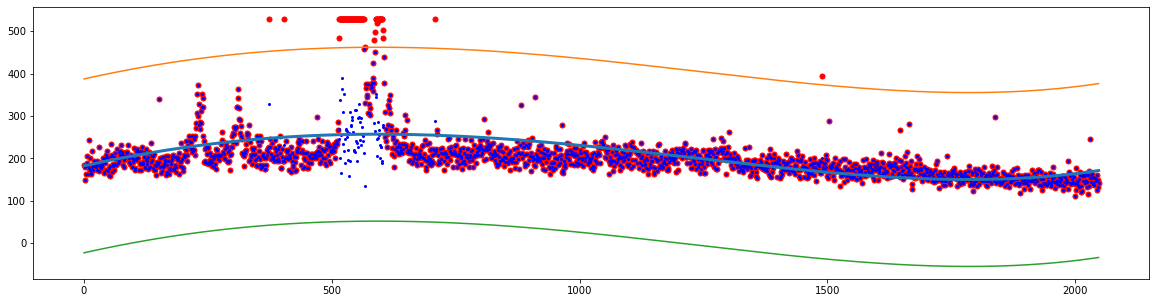

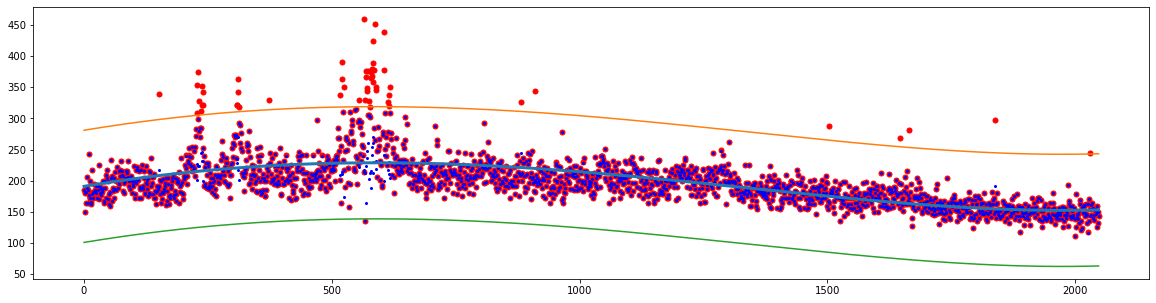

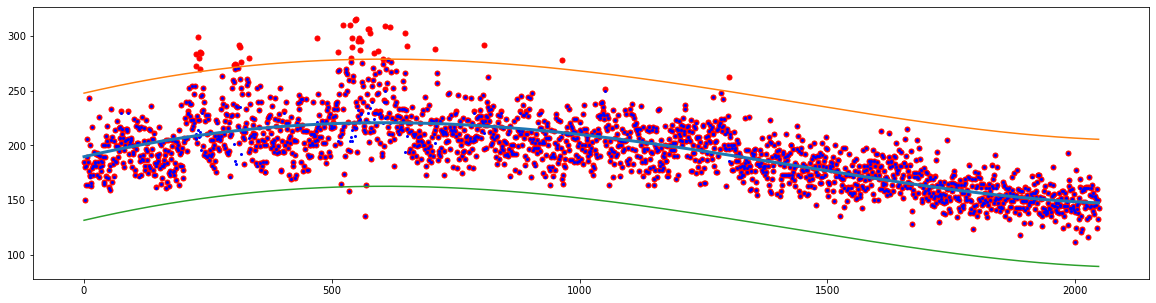

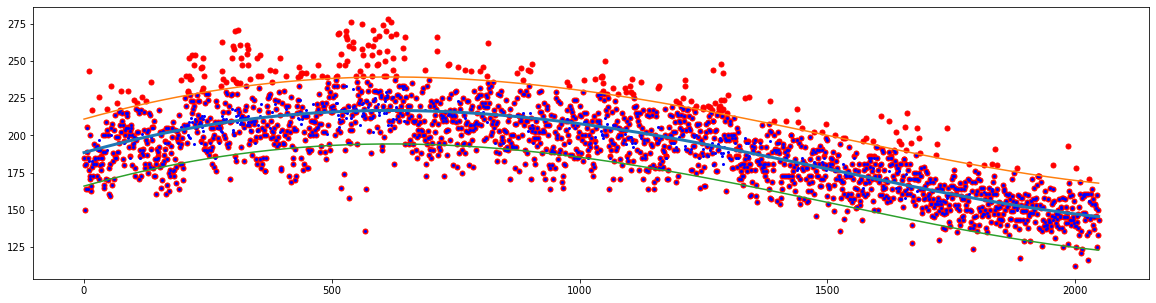

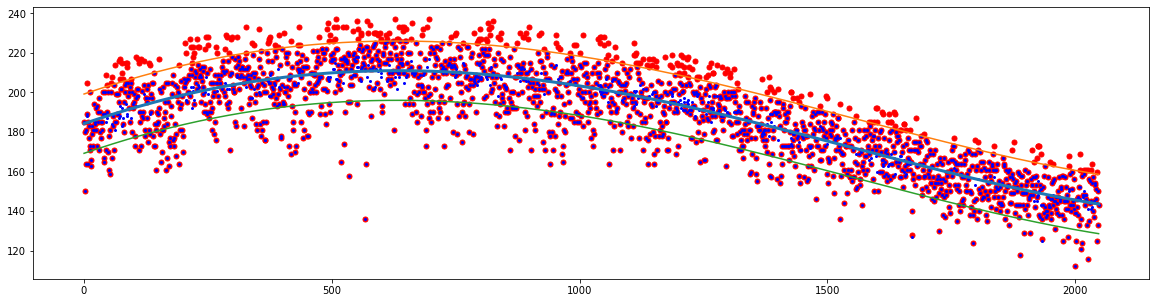

In [2]:
MA = MorphAn()

image_path = os.path.join(module_path,'src','example','images_raw','DIV7-Plate1_8wp_smFISH_A1_2.tif')
target_slice = 658

image = io.imread(image_path)
xDim = np.arange(image.shape[0])
image_slice = image[target_slice]
display = True

image_slice = MA.background_processor(xDim,image_slice,   10   , True,True,display)
image_slice = MA.background_processor(xDim,image_slice,   5   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   3   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   2   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   1   , False,False,display)
image_slice = MA.background_processor(xDim,image_slice,   .5   , False,False,display)

#### *Generate Backgrounds*
* Edit "output_path" variable with a desired path to save the processed image
* Edit "threshold_parameters" variable with the desired parameters
* Edit "apply_lower_threshold" variable with the desired boolean values
* Edit "precut_bool" variable with the desired boolean values
* Edit "num_process" variable with the number of CPU processes that you want to use to perform multiprocessing
* Edit "image_path" variable with a path to an image that you want to evaluate
* Edit "target_slice" variable with a row index that you want to evaluate

In [3]:
output_path = os.path.join(module_path,'src','example','images_background','DIV7-Plate1_8wp_smFISH_A1_2.tif')
threshold_parameters = [10,5,3,2,1,.5]
apply_lower_threshold = [True,False,False,False,False,False]
precut_bool = [True,False,False,False,False,False]
num_process = 20
image_path = os.path.join(module_path,'src','example','images_raw','DIV7-Plate1_8wp_smFISH_A1_2.tif')
target_slice = 1024

MA = MorphAn()
image = io.imread(image_path)
xDim = np.arange(image.shape[0])
image_slice = image[target_slice]
display = True

for thres_param, low_thres, precut in zip(threshold_parameters,apply_lower_threshold,precut_bool):
        arguments = [(xDim,i,thres_param,low_thres,precut) for i in image]
        with mp.Pool(num_process) as p:
            result = p.map(MA.bg_wrapper,arguments)

image_background = np.vstack(result)
io.imsave(output_path,image_background)

<ipython-input-3-b7ee3042bc19>:21: UserWarning: /data/hyun/Analysis/scripts/MorphAn/src/example/images_background/DIV7-Plate1_8wp_smFISH_A1_2.tif is a low contrast image
  io.imsave(output_path,image_background)
